<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/moons_agglo_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


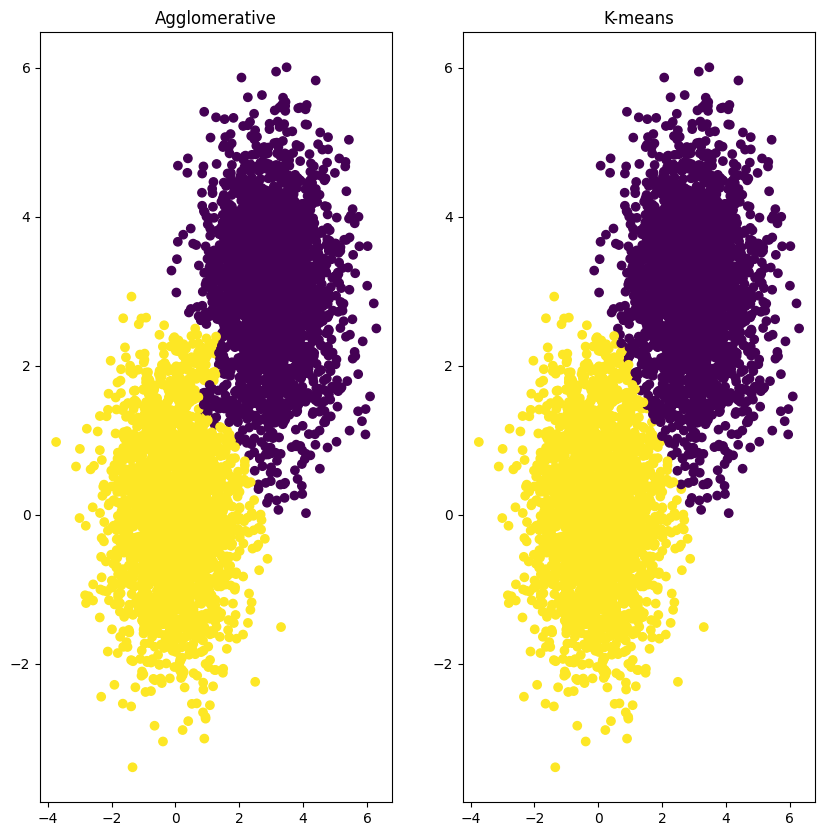

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_moons,make_blobs

# Genera datos aleatoriamente en dos grupos localizados en posiciones diferentes:
n_samples = 5000

centers = [(0, 0),(3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)
#X, y = make_moons(n_samples=n_samples,noise=0.1)

agglo = AgglomerativeClustering(n_clusters=2).fit_predict(X) 
kmeans = KMeans(n_clusters=2).fit_predict(X) 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=agglo)
ax.set_title('Agglomerative')
ax1 = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)
ax1.set_title('K-means')
plt.show()

Numero d'observacions a cada cluster:

In [4]:
cluster1_kmeans = kmeans[kmeans==0]
cluster2_kmeans = kmeans[kmeans==1]
cluster1_agglo = agglo[agglo==0]
cluster2_agglo = agglo[agglo==1]

print('kmeans {} {}'.format(cluster1_kmeans.shape[0],cluster2_kmeans.shape[0]))
print('agglo {} {}'.format(cluster1_agglo.shape[0],cluster2_agglo.shape[0]))

kmeans 2485 2515
agglo 3801 1199


Comparem els dos resultats fent servir una mesura de similitud entre clusterings anomenada Adjusted Rand Score

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score

v1 = [0,0,1,1,1,1]
v2 = [1,1,1,0,0,0]

ARS = adjusted_rand_score(v1,v2)
print('ARS = {}'.format(ARS))

ARS = 0.32432432432432434


In [12]:
from sklearn.metrics.cluster import adjusted_rand_score

ARS = adjusted_rand_score(agglo,kmeans)
print('ARS = {}'.format(ARS))

ARS = 0.9549108204247243
